In [ ]:
pip install faker


In [567]:
import pandas as pd
import numpy as np
import random
from faker import Faker

# Set random seed for reproducibility
np.random.seed(42)

# Initialize Faker instance
fake = Faker()

# Define dataset size
n_samples = 20000

# Generate data
data = {
    'User_ID': [f"U{str(i).zfill(5)}" for i in range(1, n_samples + 1)],
    'Age': np.random.randint(18, 65, size=n_samples),
    'Gender': np.random.choice(['Male', 'Female'], size=n_samples),
    'Height_cm': np.random.randint(150, 180, size=n_samples),
    'Weight_kg': np.random.randint(50, 120, size=n_samples),
    'BMI': np.round(np.random.uniform(18.5, 35.0, size=n_samples), 2),
    'Workout_Type': np.random.choice(['Cardio', 'Strength', 'Yoga'], size=n_samples),
    'Workout_Duration_min': np.random.randint(20, 120, size=n_samples),
    'Heart_Rate_avg': np.random.randint(60, 100, size=n_samples),
    'Intensity_Level': np.random.choice(['Low', 'Medium', 'High'], size=n_samples),
    'Diet_Type': np.random.choice(['Vegan', 'Vegetarian', 'Mixed'], size=n_samples),
    'Sleep_Hours': np.round(np.random.uniform(4, 9, size=n_samples), 1),
    'Hydration_Liters': np.round(np.random.uniform(0.5, 3.0, size=n_samples), 1),
    'Workout_Frequency': np.random.randint(1, 7, size=n_samples),
    'Calories_Burned': np.random.choice(['Low', 'Medium', 'High'], size=n_samples),
}

# Convert dictionary to pandas DataFrame
df = pd.DataFrame(data)

# Inspect the first few rows of the DataFrame
print(df.head())

# Optionally, you can save the dataset to a CSV file
df.to_csv('synthetic_fitness_data_with_faker.csv', index=False)


  User_ID  Age  Gender  Height_cm  Weight_kg    BMI Workout_Type  \
0  U00001   56    Male        162        114  27.45     Strength   
1  U00002   46  Female        158         58  34.32         Yoga   
2  U00003   32    Male        151         66  21.90     Strength   
3  U00004   60    Male        154        114  29.30         Yoga   
4  U00005   25    Male        162         52  19.22       Cardio   

   Workout_Duration_min  Heart_Rate_avg Intensity_Level   Diet_Type  \
0                    87              60            High       Mixed   
1                    80              72            High  Vegetarian   
2                   111              91          Medium       Vegan   
3                    92              71          Medium       Vegan   
4                    70              90          Medium       Mixed   

   Sleep_Hours  Hydration_Liters  Workout_Frequency Calories_Burned  
0          7.1               2.0                  3            High  
1          7.9          

In [568]:
# Create DataFrame
df = pd.DataFrame(data)

In [569]:
# 1. Add missing values
for _ in range(5000):  # Randomly add 200 NaN values
    # Ensure row index is within bounds (0 to n_samples - 1)
    row_index = np.random.randint(0, df.shape[0])  # Use df.shape[0] for number of rows
    # Ensure column index is within bounds (0 to number of columns - 1)
    col_index = np.random.randint(0, df.shape[1])  # Use df.shape[1] for number of columns
    df.iloc[row_index, col_index] = np.nan

In [570]:
# 2. Add duplicates
duplicates = df.sample(3000)  # Randomly duplicate 50 rows
df = pd.concat([df, duplicates], ignore_index=True)

In [571]:
# prompt: add outliners

# 3. Add outliers
# Outliers in 'Age'
df.loc[df.sample(frac=0.01).index, 'Age'] = 99

# Outliers in 'Height_cm'
df.loc[df.sample(frac=0.01).index, 'Height_cm'] = 250

# Outliers in 'Weight_kg'
df.loc[df.sample(frac=0.01).index, 'Weight_kg'] = 180

# Outliers in 'BMI'
df.loc[df.sample(frac=0.01).index, 'BMI'] = 99

# Outliers in 'Workout_Duration_min'
df.loc[df.sample(frac=0.01).index, 'Workout_Duration_min'] = 300

# Outliers in 'Heart_Rate_avg'
df.loc[df.sample(frac=0.01).index, 'Heart_Rate_avg'] = 250

# Outliers in 'Sleep_Hours'
df.loc[df.sample(frac=0.01).index, 'Sleep_Hours'] = 15

# Outliers in 'Hydration_Liters'
df.loc[df.sample(frac=0.01).index, 'Hydration_Liters'] = 10

# Outliers in 'Workout_Frequency'
df.loc[df.sample(frac=0.01).index, 'Workout_Frequency'] = 15

print(df.head())

  User_ID   Age  Gender  Height_cm  Weight_kg    BMI Workout_Type  \
0  U00001  99.0    Male      162.0      114.0  27.45     Strength   
1  U00002   NaN  Female      158.0       58.0  34.32         Yoga   
2  U00003  32.0    Male      151.0       66.0  21.90     Strength   
3  U00004  60.0    Male      154.0      114.0  29.30         Yoga   
4  U00005   NaN    Male      162.0       52.0  19.22       Cardio   

   Workout_Duration_min  Heart_Rate_avg Intensity_Level   Diet_Type  \
0                   NaN           250.0            High       Mixed   
1                  80.0            72.0            High  Vegetarian   
2                 111.0            91.0          Medium       Vegan   
3                  92.0            71.0          Medium         NaN   
4                  70.0            90.0          Medium       Mixed   

   Sleep_Hours  Hydration_Liters  Workout_Frequency Calories_Burned  
0          7.1               2.0                3.0            High  
1          7.9    

In [572]:
import numpy as np

# Get the number of samples (rows) in the DataFrame
n_samples = len(df)

# Loop through numerical columns and add outliers
numerical_columns = df.select_dtypes(include=['number']).columns


# Loop through categorical columns and add outliers
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Define a list of possible "outlier" categories (for example, non-existent categories)
outlier_categories = ['Unknown', 'Other', 'Invalid', 'N/A']

# Add random "outliers" to categorical columns
for column in categorical_columns:
    for _ in range(4000):  # Add 4000 random "outliers" to each categorical column
        random_row = np.random.randint(0, n_samples)  # Random row index
        outlier_category = np.random.choice(outlier_categories)  # Random outlier category

        # Assign the outlier category to the selected row and column
        df.loc[random_row, column] = outlier_category

print("Outliers added to both numerical and categorical columns.")


Outliers added to both numerical and categorical columns.


In [573]:
# prompt: generate csv file df

# Assuming the provided code has been executed and the DataFrame 'df' is available.

# Convert DataFrame to CSV
df.to_csv('output.csv', index=False)

In [574]:
dt = pd.read_csv('output.csv')

In [575]:
dt.head()

,User_ID,Age,Gender,Height_cm,Weight_kg,BMI,Workout_Type,Workout_Duration_min,Heart_Rate_avg,Intensity_Level,Diet_Type,Sleep_Hours,Hydration_Liters,Workout_Frequency,Calories_Burned
0,Other,99.0,Male,162.0,114.0,27.45,Strength,NaN,250.0,High,Mixed,7.1,2.0,3.0,High
1,Invalid,NaN,Female,158.0,58.0,34.32,NaN,80.0,72.0,Unknown,Vegetarian,7.9,1.2,4.0,NaN
2,U00003,32.0,Male,151.0,66.0,21.90,Strength,111.0,91.0,Medium,Vegan,8.7,0.9,6.0,Low
3,U00004,60.0,Invalid,154.0,114.0,29.30,Yoga,92.0,71.0,Medium,Unknown,8.6,0.7,1.0,High
4,U00005,NaN,Male,162.0,52.0,19.22,Cardio,70.0,90.0,Medium,Invalid,8.7,1.1,2.0,High


In [ ]:
# Assuming `dt` is your DataFrame
categorical_columns = dt.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)


Index(['User_ID', 'Gender', 'Workout_Type', 'Intensity_Level', 'Diet_Type',
       'Calories_Burned'],
      dtype='object')


In [ ]:
dt.drop(columns=['User_ID'], inplace=True)

In [ ]:
# Fill missing values with 0 for numerical columns only
dt[dt.select_dtypes(include=['number']).columns] = dt.select_dtypes(include=['number']).fillna(0)


In [ ]:
# List of categorical columns
categorical_columns = ['Gender', 'Workout_Type', 'Intensity_Level', 'Diet_Type', 'Calories_Burned']

# Fill missing values with a placeholder value (e.g., 'Unknown')
for column in categorical_columns:
    dt[column] = dt[column].fillna('Unknown')


In [ ]:
# Separate features (X) and target (y)
X = dt.drop(columns=['Calories_Burned'])  # Drop target and ID columns
y = dt['Calories_Burned']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical features in X_train and X_test
label_encoders = {}
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

# Encode the target variable 'Calories_Burned'
target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(y_train)
y_test = target_encoder.transform(y_test)

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Convert target classes to strings for the classification report
target_names = [str(cls) for cls in target_encoder.classes_]
report = classification_report(y_test, y_pred, target_names=target_names)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.22
Classification Report:
              precision    recall  f1-score   support

        High       0.21      0.19      0.20       319
     Invalid       0.05      0.01      0.01       148
         Low       0.23      0.24      0.24       300
      Medium       0.23      0.18      0.20       324
       Other       0.11      0.01      0.02       159
     Unknown       0.21      0.44      0.29       350

    accuracy                           0.22      1600
   macro avg       0.17      0.18      0.16      1600
weighted avg       0.19      0.22      0.19      1600



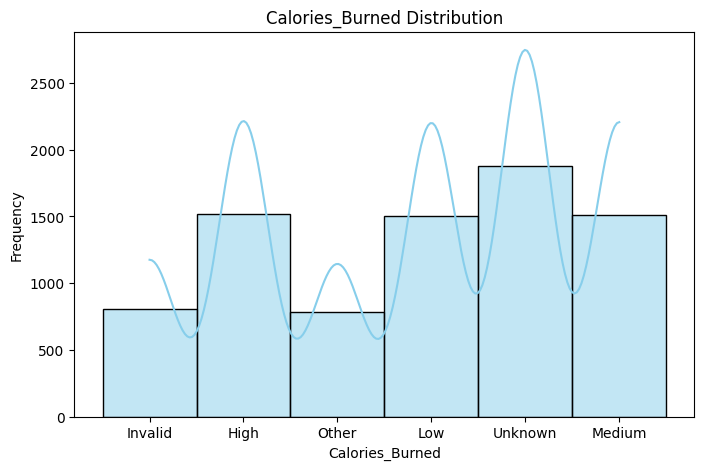

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Histogram for the target variable 'Price'
plt.figure(figsize=(8, 5))
sns.histplot(dt['Calories_Burned'], kde=True, bins=30, color='skyblue')  # Changed to df['Calories_Burned']
plt.title('Calories_Burned Distribution')
plt.ylabel('Frequency')
plt.show()

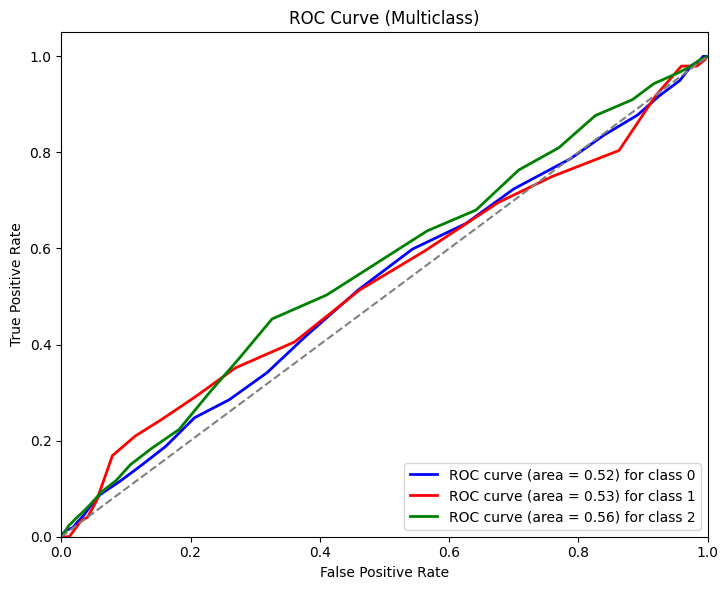

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize

# Binarize the target variable for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Predict probabilities for each class
y_prob = rf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # Subplot for ROC Curve
colors = ['blue', 'red', 'green']  # Adjust colors as needed

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')

# ... (rest of the code for Precision-Recall curve remains the same)

plt.tight_layout()
plt.show()

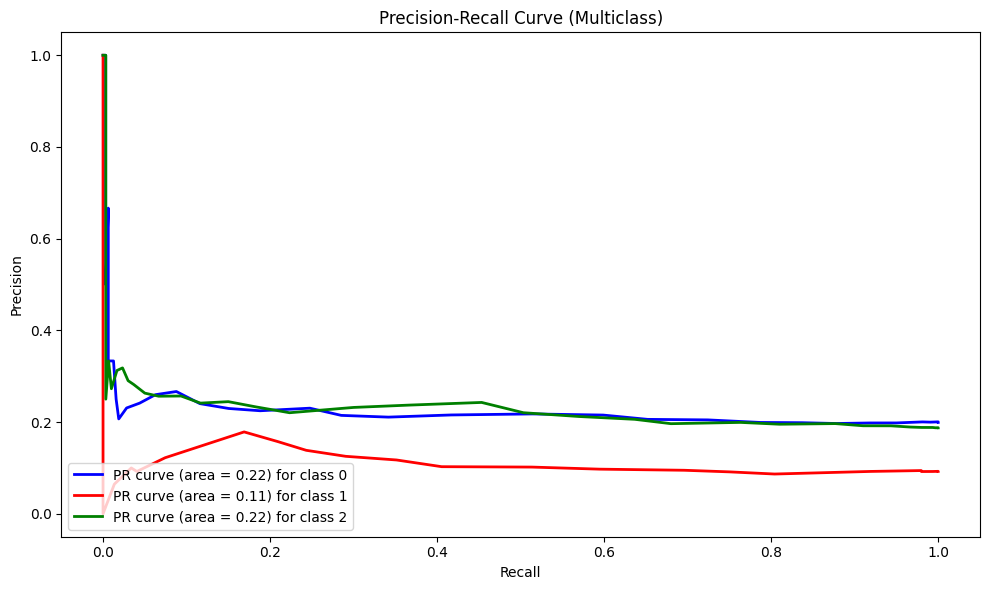

In [ ]:
# Binarize the target variable for multiclass PR curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Predict probabilities for each class
y_prob = rf.predict_proba(X_test)

# Compute Precision-Recall curve for each class
precision = dict()
recall = dict()
pr_auc = dict()

for i in range(n_classes):

    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_prob[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plot Precision-Recall Curve for each class
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green']  # Adjust colors as needed

for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'PR curve (area = {pr_auc[i]:.2f}) for class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Multiclass)')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [576]:
df = pd.read_csv('/content/output.csv')

In [577]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8200 entries, 0 to 8199
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   User_ID               7010 non-null   object 
 1   Age                   7869 non-null   float64
 2   Gender                7131 non-null   object 
 3   Height_cm             7844 non-null   float64
 4   Weight_kg             7893 non-null   float64
 5   BMI                   7889 non-null   float64
 6   Workout_Type          7094 non-null   object 
 7   Workout_Duration_min  7876 non-null   float64
 8   Heart_Rate_avg        7897 non-null   float64
 9   Intensity_Level       7075 non-null   object 
 10  Diet_Type             7132 non-null   object 
 11  Sleep_Hours           7882 non-null   float64
 12  Hydration_Liters      7891 non-null   float64
 13  Workout_Frequency     7913 non-null   float64
 14  Calories_Burned       7038 non-null   object 
dtypes: float64(9), object

In [578]:
df.head()

,User_ID,Age,Gender,Height_cm,Weight_kg,BMI,Workout_Type,Workout_Duration_min,Heart_Rate_avg,Intensity_Level,Diet_Type,Sleep_Hours,Hydration_Liters,Workout_Frequency,Calories_Burned
0,Other,99.0,Male,162.0,114.0,27.45,Strength,NaN,250.0,High,Mixed,7.1,2.0,3.0,High
1,Invalid,NaN,Female,158.0,58.0,34.32,NaN,80.0,72.0,Unknown,Vegetarian,7.9,1.2,4.0,NaN
2,U00003,32.0,Male,151.0,66.0,21.90,Strength,111.0,91.0,Medium,Vegan,8.7,0.9,6.0,Low
3,U00004,60.0,Invalid,154.0,114.0,29.30,Yoga,92.0,71.0,Medium,Unknown,8.6,0.7,1.0,High
4,U00005,NaN,Male,162.0,52.0,19.22,Cardio,70.0,90.0,Medium,Invalid,8.7,1.1,2.0,High


In [ ]:
df.dtypes

,0
User_ID,object
Age,float64
Gender,object
Height_cm,float64
Weight_kg,float64
BMI,float64
Workout_Type,object
Workout_Duration_min,float64
Heart_Rate_avg,float64
Intensity_Level,object


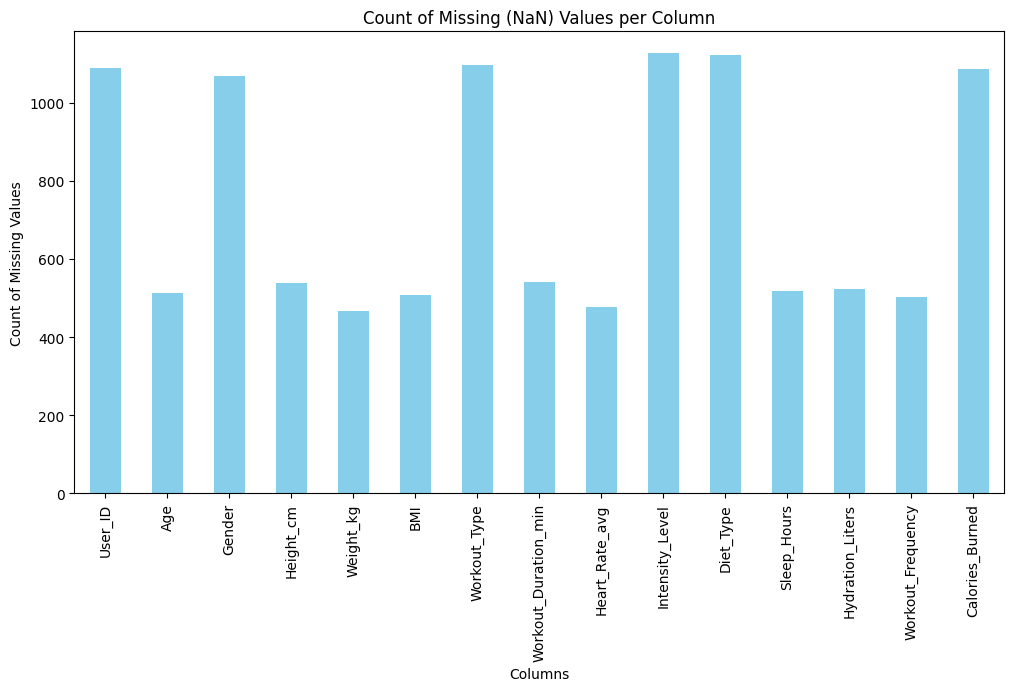

In [579]:
import matplotlib.pyplot as plt

# Count missing (NaN) values in each column
missing_counts = df.isnull().sum()

# Plot a bar chart of missing values
plt.figure(figsize=(12, 6))
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Missing (NaN) Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=90)
plt.show()


Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.698618x0.77)


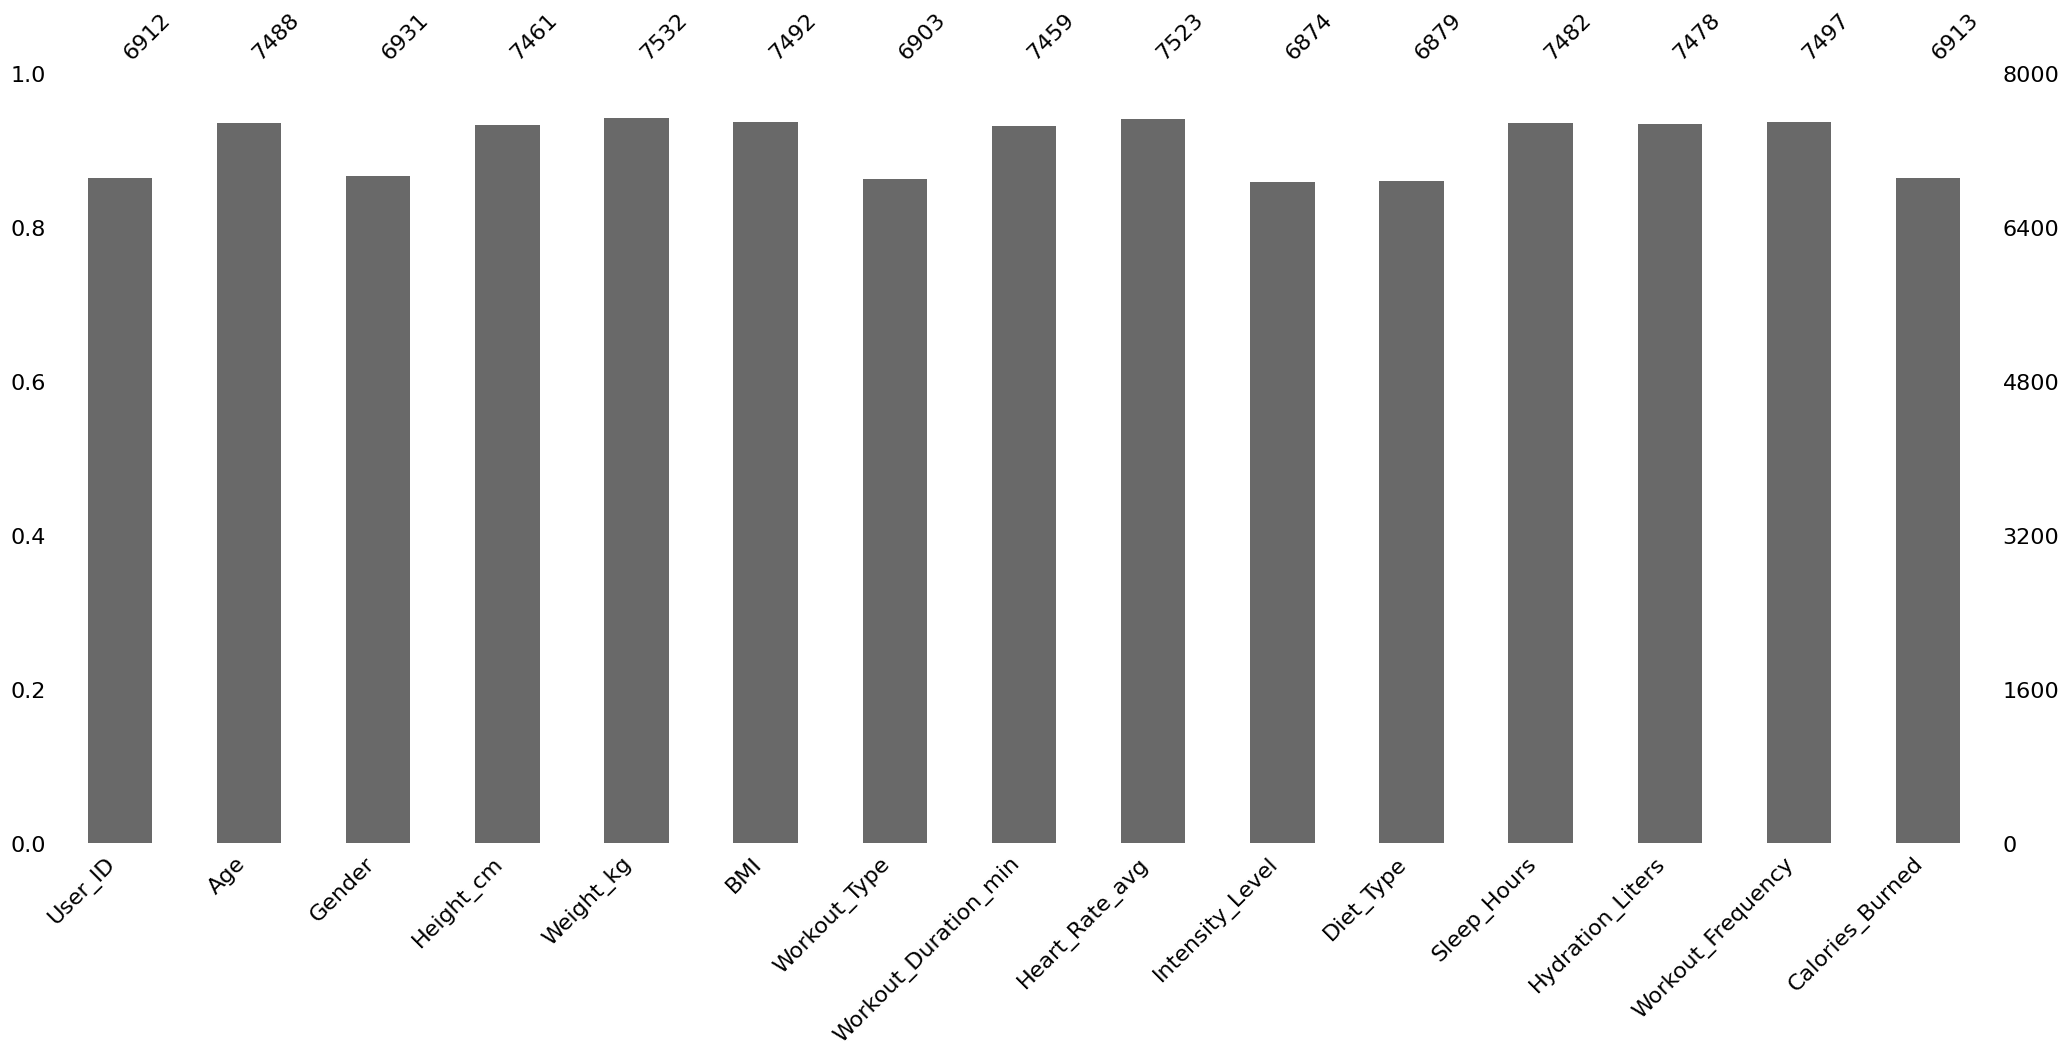

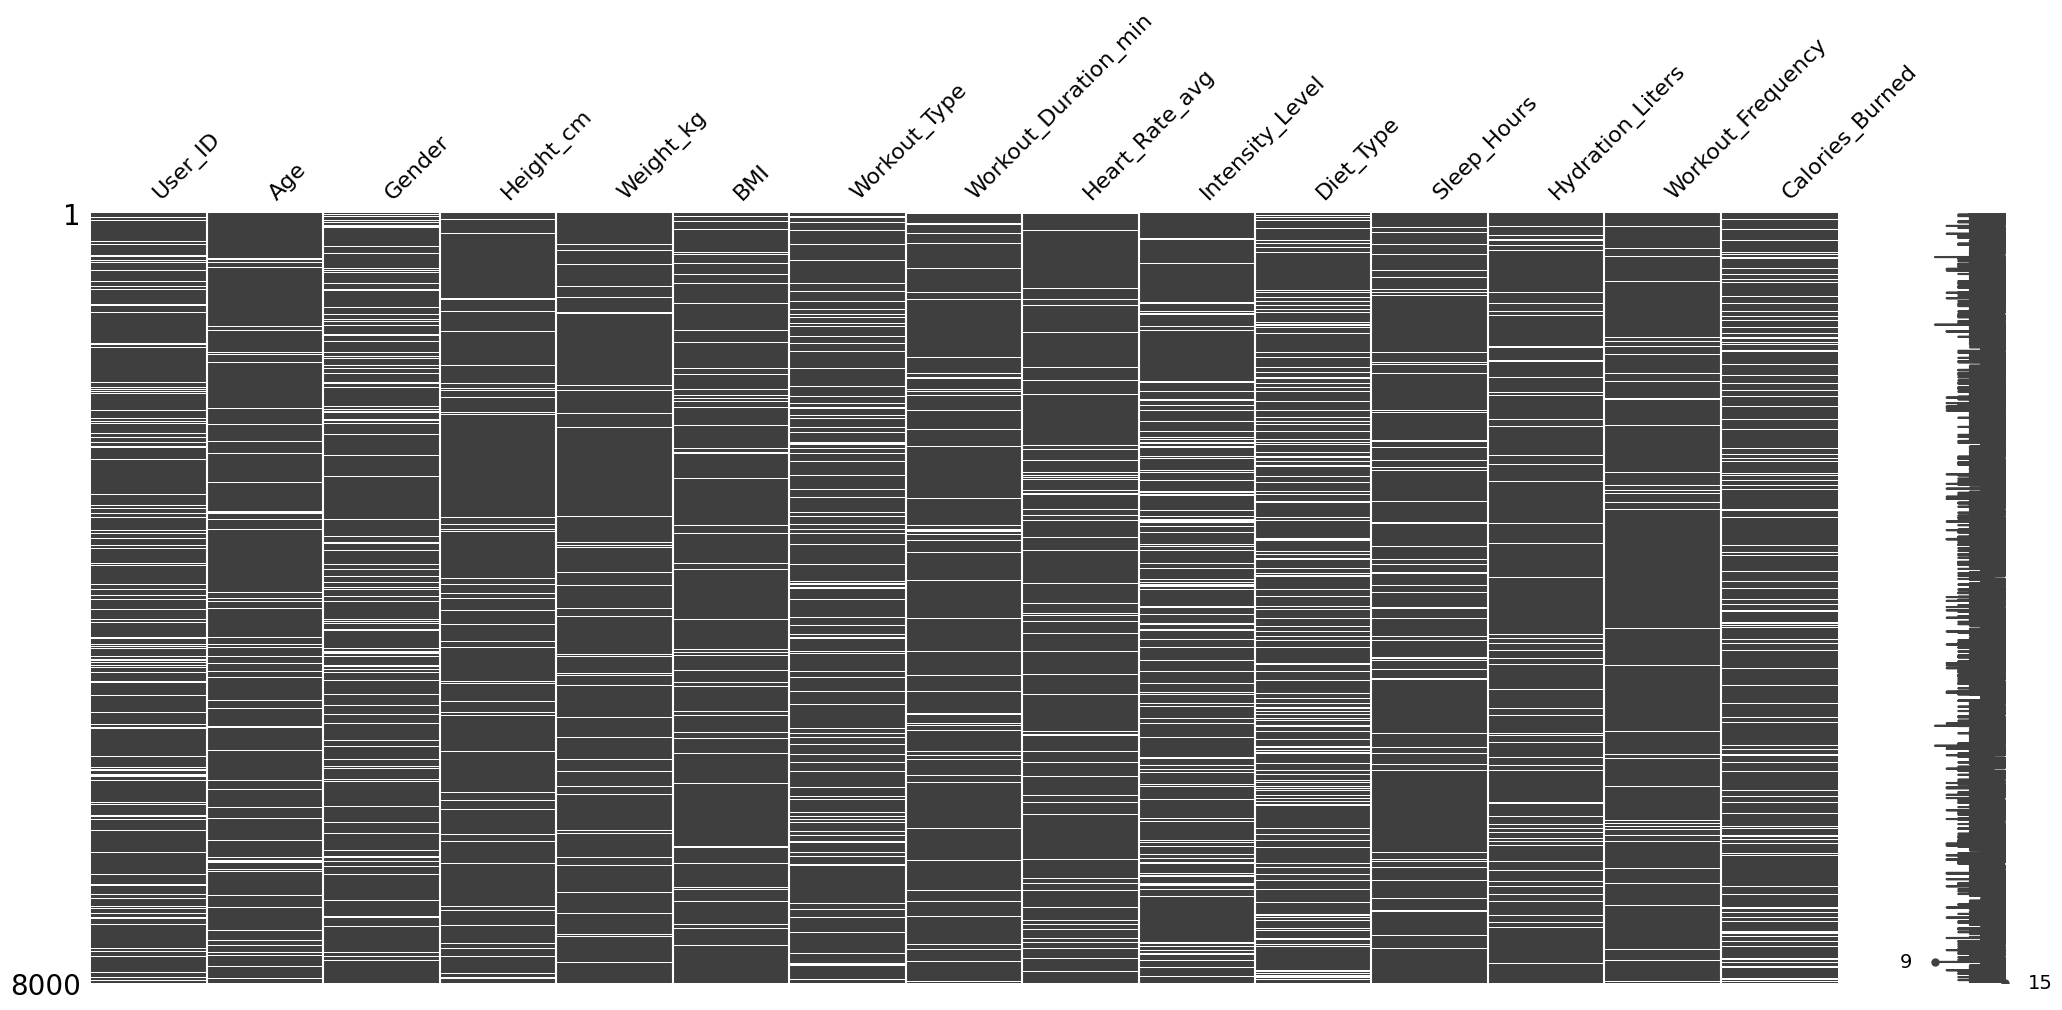

In [580]:
print(msno.bar(df))
print(msno.matrix(df))


In [581]:
df.isnull().sum()

,0
User_ID,1088
Age,512
Gender,1069
Height_cm,539
Weight_kg,468
BMI,508
Workout_Type,1097
Workout_Duration_min,541
Heart_Rate_avg,477
Intensity_Level,1126


In [582]:
nul = df.isnull().sum()
nnul = df.notnull().sum()
print((nul/nnul)*100)

User_ID                 15.740741
Age                      6.837607
Gender                  15.423460
Height_cm                7.224233
Weight_kg                6.213489
BMI                      6.780566
Workout_Type            15.891641
Workout_Duration_min     7.252983
Heart_Rate_avg           6.340556
Intensity_Level         16.380564
Diet_Type               16.295973
Sleep_Hours              6.923283
Hydration_Liters         6.980476
Workout_Frequency        6.709350
Calories_Burned         15.723998
dtype: float64


Text(0.5, 1.0, 'Missing Values Heatmap')

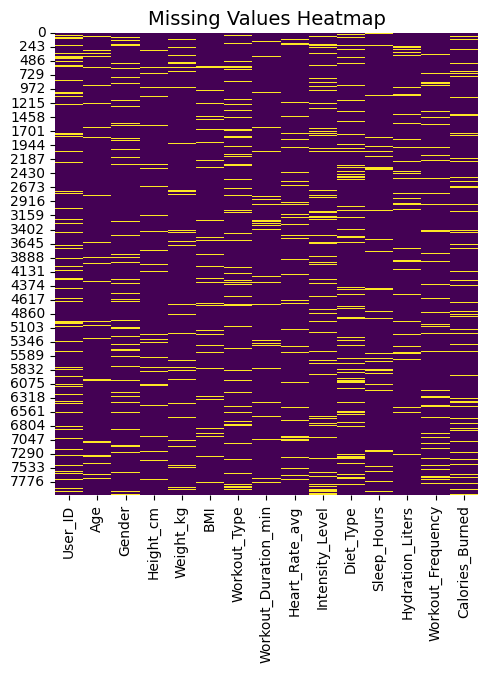

In [583]:
# 1. Missing Values Heatmap
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap", fontsize=14)

In [ ]:
# prompt: print numerical coloumn

# Assuming 'df' is your DataFrame from the previous code
numerical_columns = df.select_dtypes(include=['number']).columns
print(numerical_columns)

Index(['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Workout_Duration_min',
       'Heart_Rate_avg', 'Sleep_Hours', 'Hydration_Liters',
       'Workout_Frequency'],
      dtype='object')


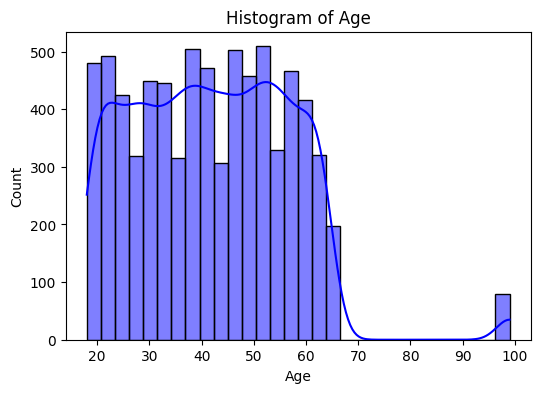

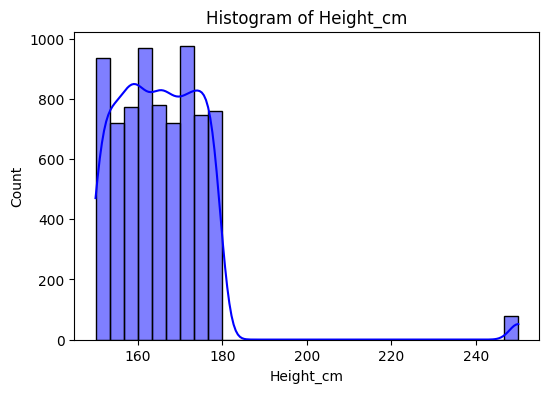

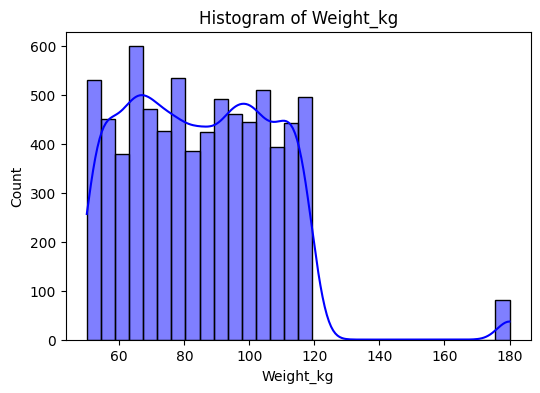

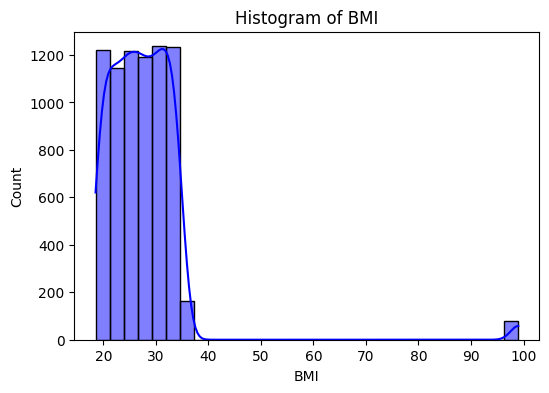

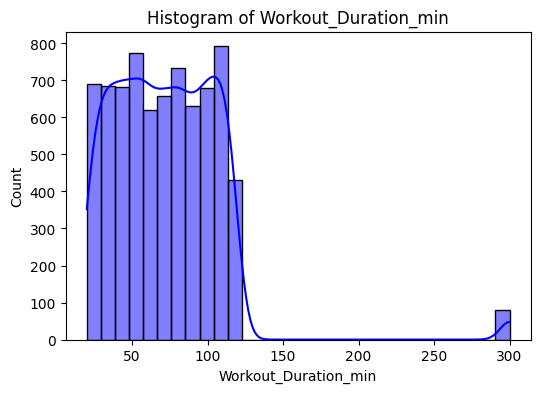

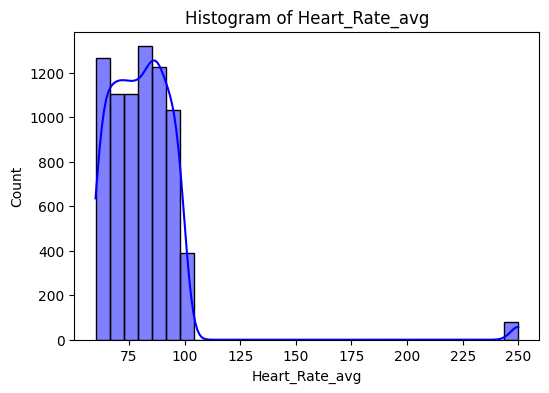

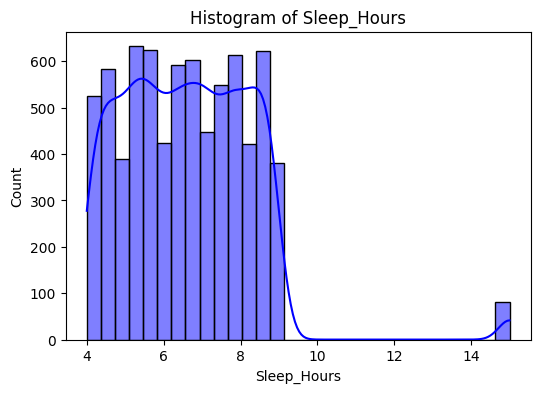

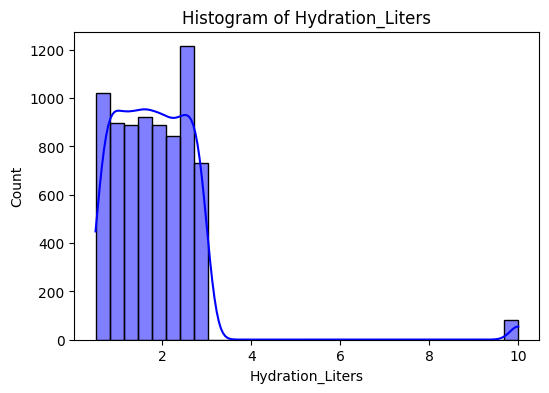

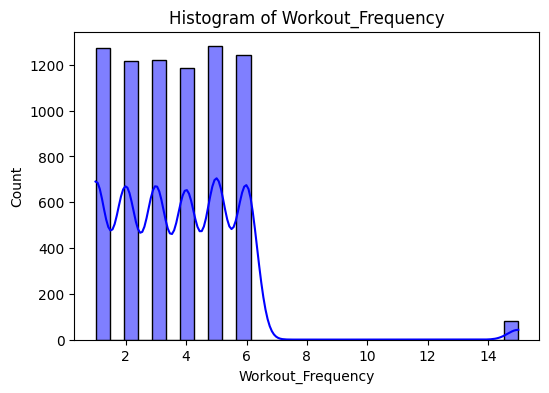

Age skewness: 0.50
Height_cm skewness: 3.37
Weight_kg skewness: 0.72
BMI skewness: 5.61
Workout_Duration_min skewness: 2.34
Heart_Rate_avg skewness: 5.52
Sleep_Hours skewness: 1.21
Hydration_Liters skewness: 4.15
Workout_Frequency skewness: 1.62


In [584]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Load your dataset
# df = pd.read_csv("your_dataset.csv")  # Replace with your dataset

# List of numerical columns
numerical_columns = ['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Workout_Duration_min',
       'Heart_Rate_avg', 'Sleep_Hours', 'Hydration_Liters',
       'Workout_Frequency']

# Plot histograms
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f"Histogram of {col}")
    plt.show()

# Calculate and display skewness
for col in numerical_columns:
    skewness = skew(df[col].dropna())
    print(f"{col} skewness: {skewness:.2f}")


In [585]:
# Numerical columns and their skewness analysis
numerical_columns = ['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Workout_Duration_min',
                     'Heart_Rate_avg', 'Sleep_Hours', 'Hydration_Liters', 'Workout_Frequency']

# Imputation for nearly symmetric data (mean)
symmetric_columns = ['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Workout_Duration_min',
                     'Sleep_Hours', 'Hydration_Liters', 'Workout_Frequency']

# Skewed columns (as identified from the skewness analysis)
skewed_columns = ['Heart_Rate_avg']

# Imputation for nearly symmetric data (mean)
for col in symmetric_columns:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)  # Replace inplace=True with direct assignment

# Imputation for skewed data (median)
for col in skewed_columns:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)  # Replace inplace=True with direct assignment

# Verify missing values after imputation
missing_values_after = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)


Missing values after imputation:
 User_ID                 1088
Age                        0
Gender                  1069
Height_cm                  0
Weight_kg                  0
BMI                        0
Workout_Type            1097
Workout_Duration_min       0
Heart_Rate_avg             0
Intensity_Level         1126
Diet_Type               1121
Sleep_Hours                0
Hydration_Liters           0
Workout_Frequency          0
Calories_Burned         1087
dtype: int64


In [586]:
# Assuming 'df' is your DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)


Index(['User_ID', 'Gender', 'Workout_Type', 'Intensity_Level', 'Diet_Type',
       'Calories_Burned'],
      dtype='object')


In [587]:
df.drop(columns=['User_ID'], inplace=True)


In [588]:
# Assuming 'df' is your DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['Gender', 'Workout_Type', 'Intensity_Level', 'Diet_Type',
       'Calories_Burned'],
      dtype='object')


In [589]:
# List of categorical columns with missing values
categorical_columns = ['Gender', 'Workout_Type', 'Intensity_Level', 'Diet_Type','Calories_Burned']

# Impute missing values with mode
for col in categorical_columns:
    mode_value = df[col].mode()[0]  # Get the most frequent value (mode)
    df[col] = df[col].fillna(mode_value)  # Replace missing values with the mode

# Verify missing values after imputation
missing_values_after = df.isnull().sum()
print("Final Missing Values:\n", missing_values_after)


Final Missing Values:
 Age                     0
Gender                  0
Height_cm               0
Weight_kg               0
BMI                     0
Workout_Type            0
Workout_Duration_min    0
Heart_Rate_avg          0
Intensity_Level         0
Diet_Type               0
Sleep_Hours             0
Hydration_Liters        0
Workout_Frequency       0
Calories_Burned         0
dtype: int64


In [590]:
df.duplicated().sum()

54

In [591]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
7995    False
7996    False
7997    False
7998    False
7999    False
Length: 8000, dtype: bool


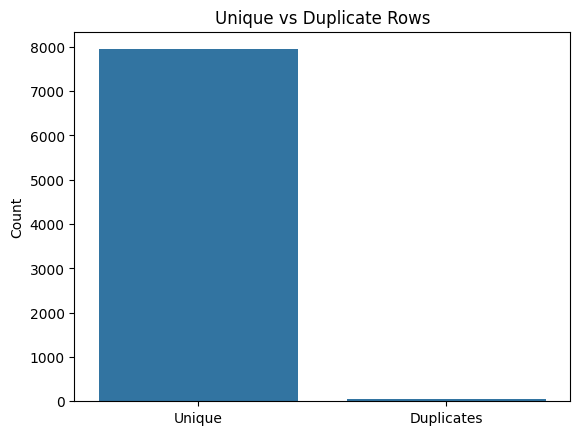

In [592]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of duplicates and unique rows
duplicate_count = df.duplicated().sum()
unique_count = len(df) - duplicate_count

# Create a bar plot
sns.barplot(x=["Unique", "Duplicates"], y=[unique_count, duplicate_count])
plt.title("Unique vs Duplicate Rows")
plt.ylabel("Count")
plt.show()


In [593]:
# Step 2: Handle Duplicates
# Remove duplicate rows
df = df.drop_duplicates()

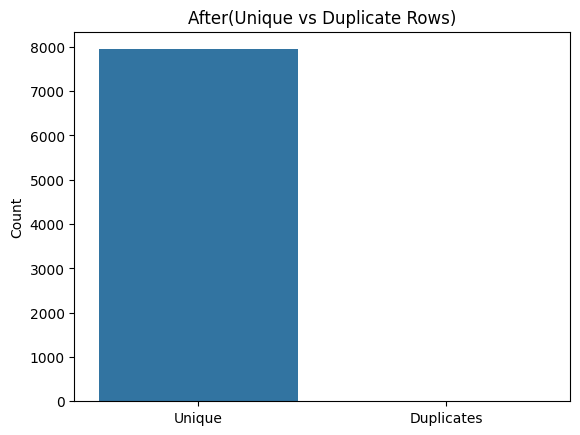

In [594]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of duplicates and unique rows
duplicate_count = df.duplicated().sum()
unique_count = len(df) - duplicate_count

# Create a bar plot
sns.barplot(x=["Unique", "Duplicates"], y=[unique_count, duplicate_count])
plt.title("After(Unique vs Duplicate Rows)")
plt.ylabel("Count")
plt.show()


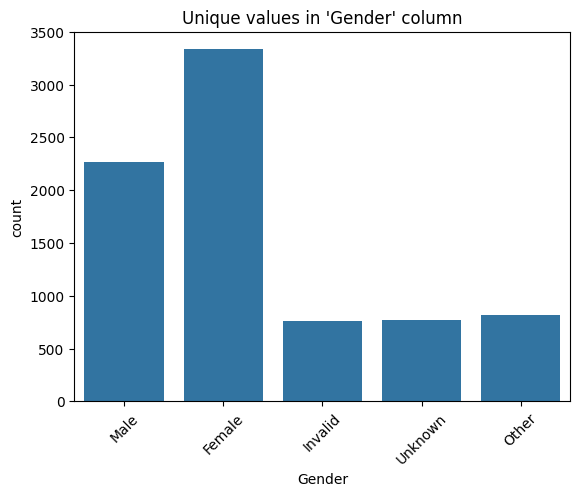

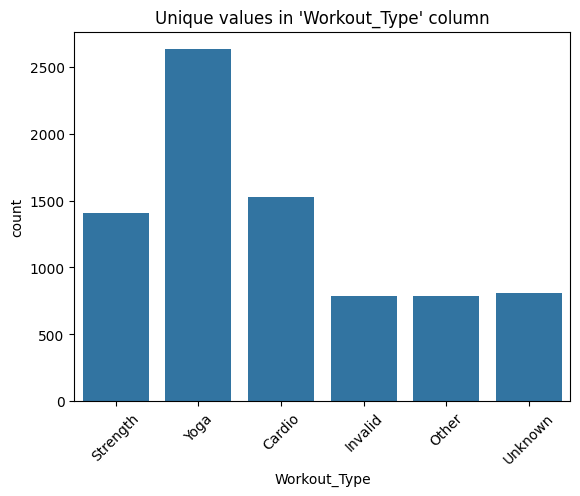

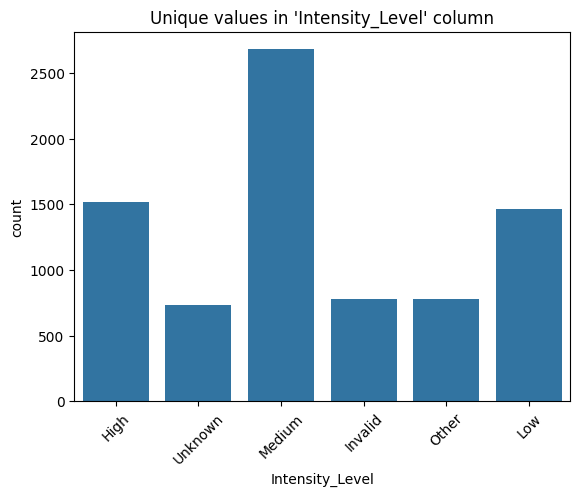

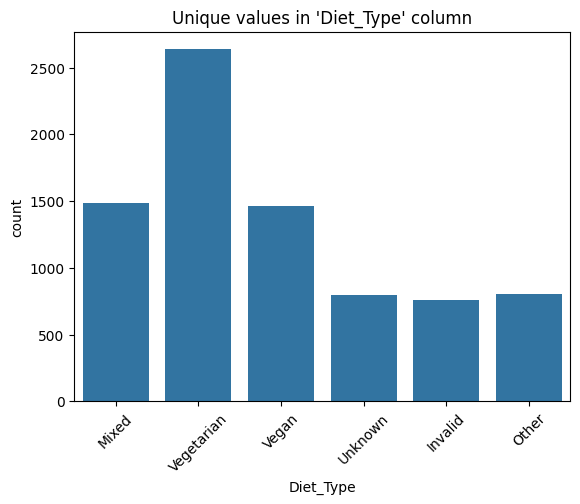

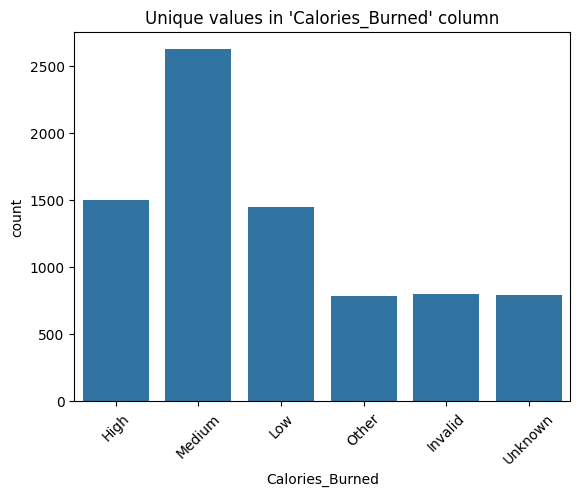

In [595]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through categorical columns and plot the unique values
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    sns.countplot(x=df[column])
    plt.title(f"Unique values in '{column}' column")
    plt.xticks(rotation=45)
    plt.show()


In [596]:
# Define a list of potential noise values
noise_values = ['Unknown', 'Other', 'Invalid', 'N/A']

# Initialize a Series to store the counts for each column
noise_counts = df.isin(noise_values).sum()

# Print the counts of noise values in each column
print("Noise counts for each column:")
print(noise_counts)

# Total noise counts in the dataset
total_noise_count = noise_counts.sum()
print(f"\nTotal noise values in the dataset: {total_noise_count}")


Noise counts for each column:
Age                        0
Gender                  2345
Height_cm                  0
Weight_kg                  0
BMI                        0
Workout_Type            2376
Workout_Duration_min       0
Heart_Rate_avg             0
Intensity_Level         2282
Diet_Type               2358
Sleep_Hours                0
Hydration_Liters           0
Workout_Frequency          0
Calories_Burned         2374
dtype: int64

Total noise values in the dataset: 11735


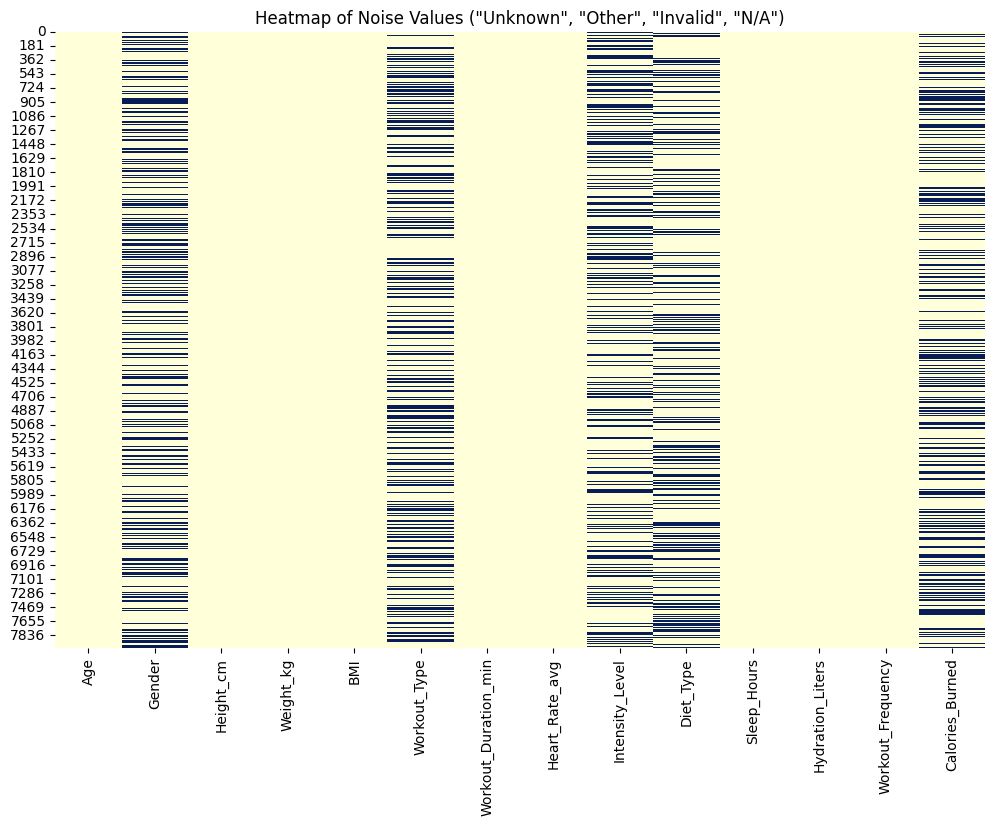

In [597]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of potential noise values
noise_values = ['Unknown', 'Other', 'Invalid', 'N/A']

# Convert all columns to string for consistency
df_str = df.astype(str)

# Create a boolean DataFrame where noise values are marked as True
noise_mask = df_str.isin(noise_values)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(noise_mask, cmap='YlGnBu', cbar=False, annot=False, fmt='g')
plt.title('Heatmap of Noise Values ("Unknown", "Other", "Invalid", "N/A")')
plt.show()


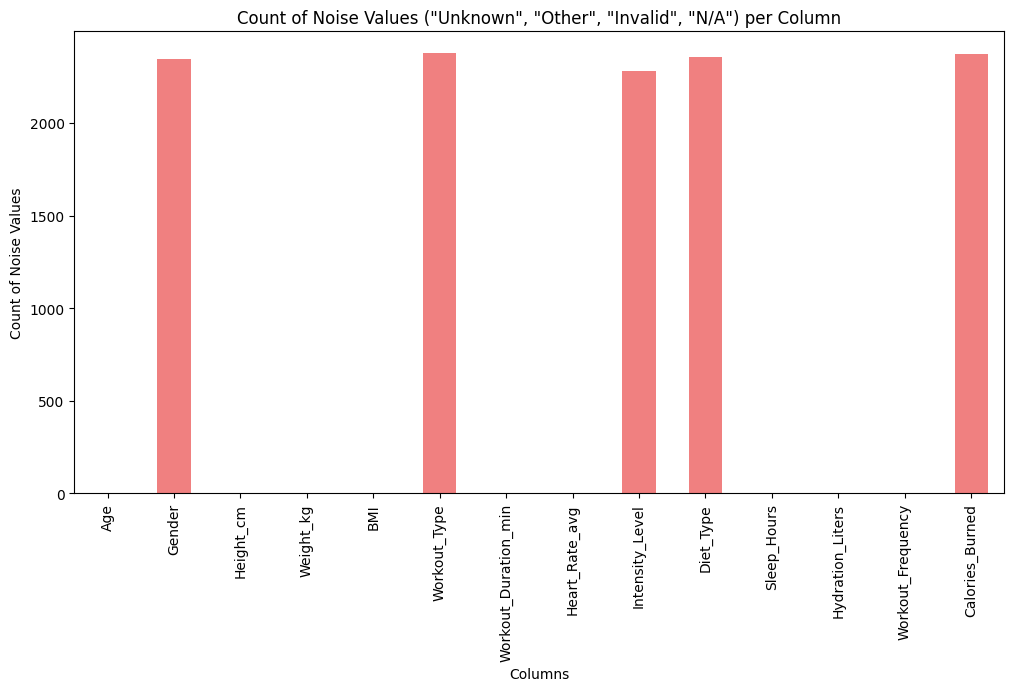

In [598]:
import matplotlib.pyplot as plt

# Define a list of noise values
noise_values = ['Unknown', 'Other', 'Invalid', 'N/A']

# Count the occurrences of noise values per column
noise_counts = df.isin(noise_values).sum()

# Plot a bar chart of noise values
plt.figure(figsize=(12, 6))
noise_counts.plot(kind='bar', color='lightcoral')
plt.title('Count of Noise Values ("Unknown", "Other", "Invalid", "N/A") per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Noise Values')
plt.xticks(rotation=90)
plt.show()


In [599]:
# Define a list of noise values
noise_values = ['Unknown', 'Other', 'Invalid', 'N/A']

# Calculate the percentage of noise values per column
noise_percentage = (df.isin(noise_values).mean()) * 100

# Print the percentages
print("Percentage of noise values per column:")
print(noise_percentage)


Percentage of noise values per column:
Age                      0.000000
Gender                  29.511704
Height_cm                0.000000
Weight_kg                0.000000
BMI                      0.000000
Workout_Type            29.901837
Workout_Duration_min     0.000000
Heart_Rate_avg           0.000000
Intensity_Level         28.718852
Diet_Type               29.675308
Sleep_Hours              0.000000
Hydration_Liters         0.000000
Workout_Frequency        0.000000
Calories_Burned         29.876668
dtype: float64


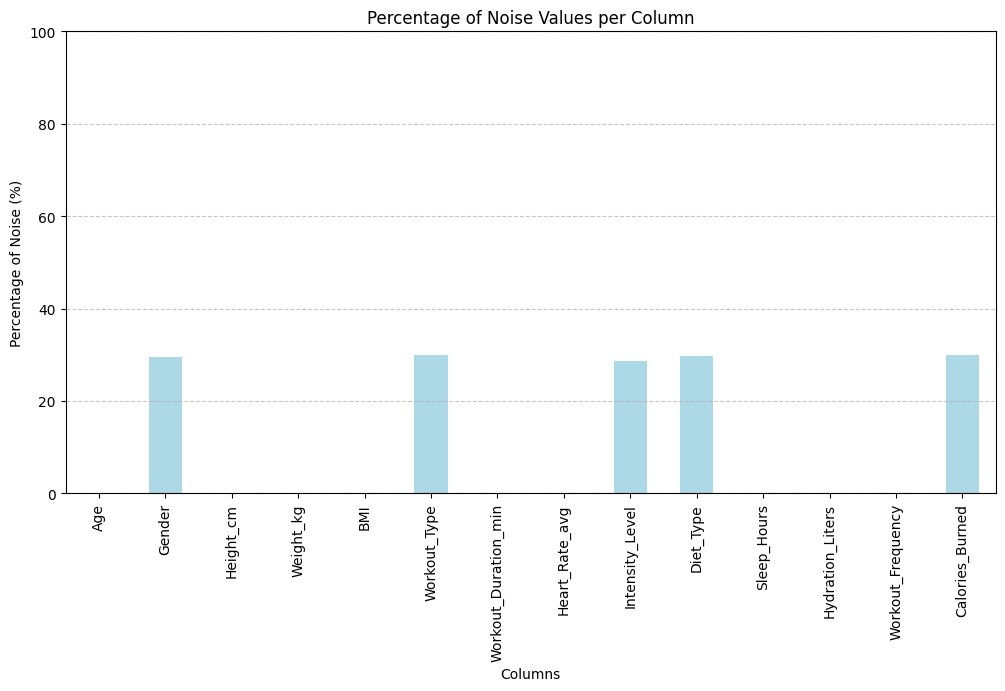

In [600]:
import matplotlib.pyplot as plt

# Define a list of noise values
noise_values = ['Unknown', 'Other', 'Invalid', 'N/A']

# Calculate the percentage of noise values per column
noise_percentage = (df.isin(noise_values).mean()) * 100

# Plot the noise percentages as a bar chart
plt.figure(figsize=(12, 6))
noise_percentage.plot(kind='bar', color='lightblue')
plt.title('Percentage of Noise Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Noise (%)')
plt.xticks(rotation=90)
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [601]:
# Define a list of noise values
noise_values = ['Unknown', 'Other', 'Invalid', 'N/A']

# Loop through each column in the dataset
for column in df.columns:
    if df[column].dtype == 'object':  # Process only categorical columns
        # Replace noise values with the mode of the column
        mode_value = df[column][~df[column].isin(noise_values)].mode()[0]
        df[column] = df[column].replace(noise_values, mode_value)

print("Mode treatment applied to noisy values.")


Mode treatment applied to noisy values.


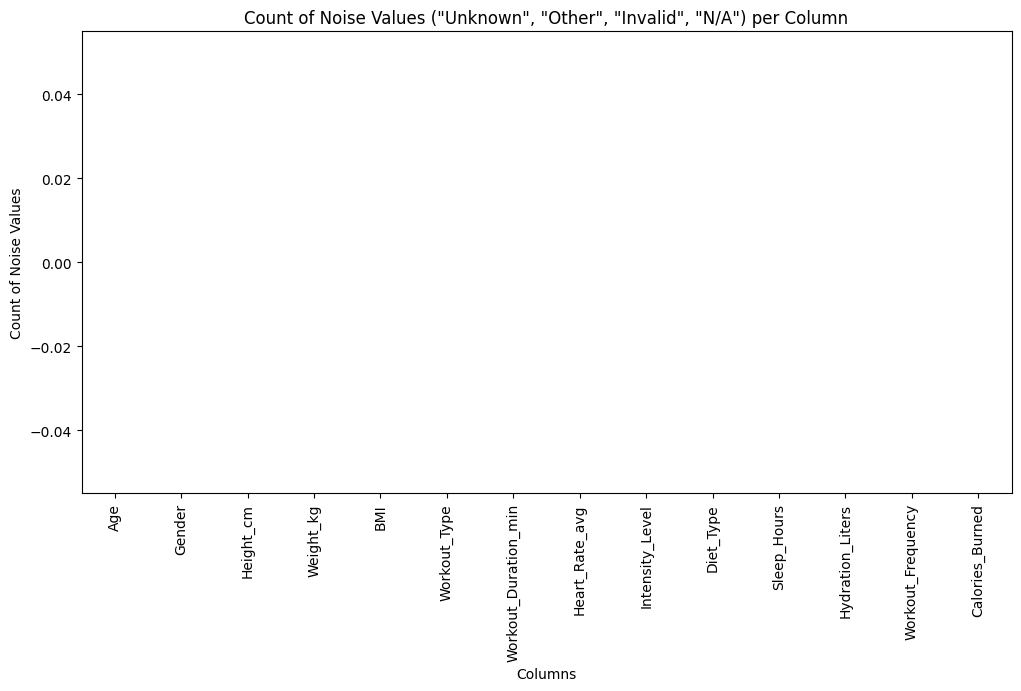

In [602]:
import matplotlib.pyplot as plt

# Define a list of noise values
noise_values = ['Unknown', 'Other', 'Invalid', 'N/A']

# Count the occurrences of noise values per column
noise_counts = df.isin(noise_values).sum()

# Plot a bar chart of noise values
plt.figure(figsize=(12, 6))
noise_counts.plot(kind='bar', color='lightcoral')
plt.title('Count of Noise Values ("Unknown", "Other", "Invalid", "N/A") per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Noise Values')
plt.xticks(rotation=90)
plt.show()


In [603]:
# Define a list of potential noise values
noise_values = ['Unknown', 'Other', 'Invalid', 'N/A']

# Initialize a Series to store the counts for each column
noise_counts = df.isin(noise_values).sum()

# Print the counts of noise values in each column
print("Noise counts for each column:")
print(noise_counts)

# Total noise counts in the dataset
total_noise_count = noise_counts.sum()
print(f"\nTotal noise values in the dataset: {total_noise_count}")


Noise counts for each column:
Age                     0
Gender                  0
Height_cm               0
Weight_kg               0
BMI                     0
Workout_Type            0
Workout_Duration_min    0
Heart_Rate_avg          0
Intensity_Level         0
Diet_Type               0
Sleep_Hours             0
Hydration_Liters        0
Workout_Frequency       0
Calories_Burned         0
dtype: int64

Total noise values in the dataset: 0


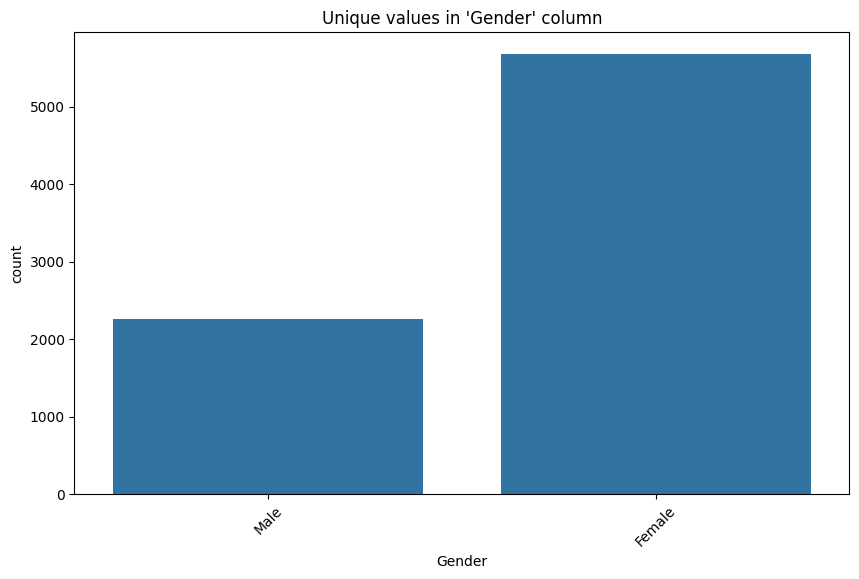

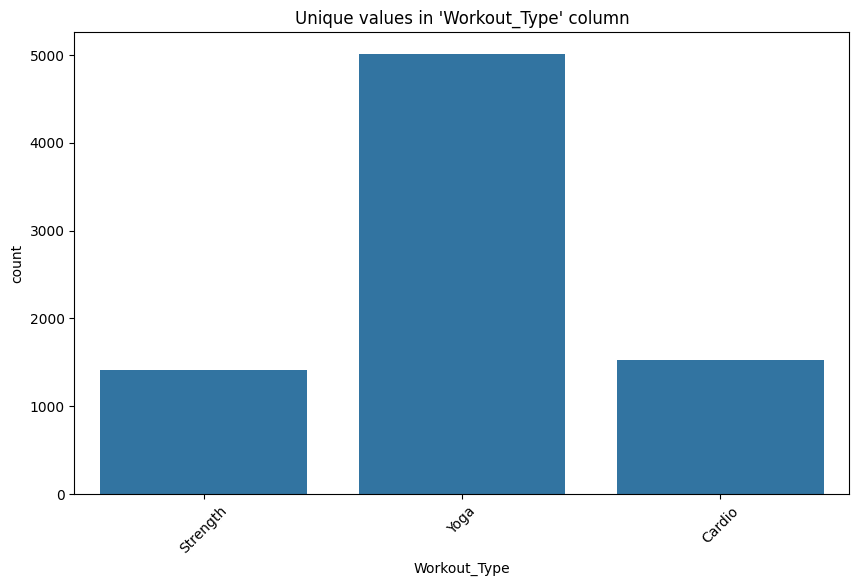

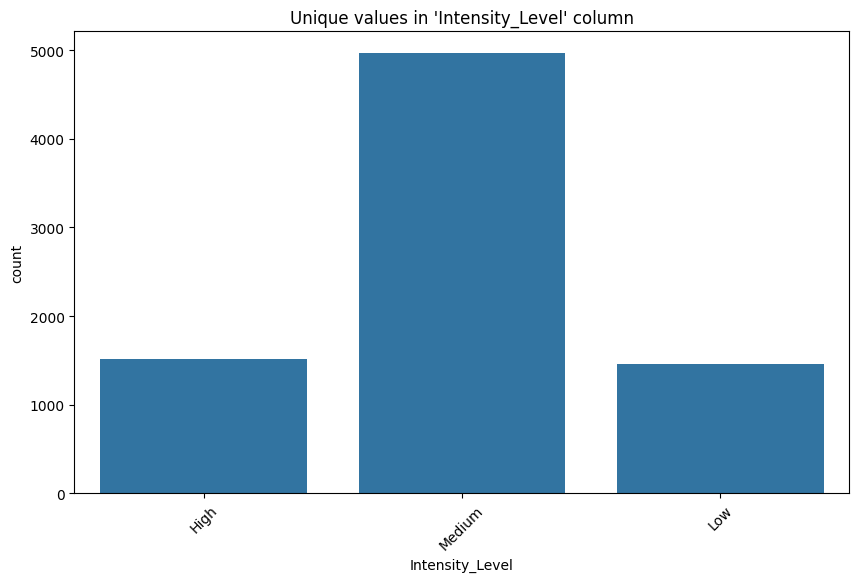

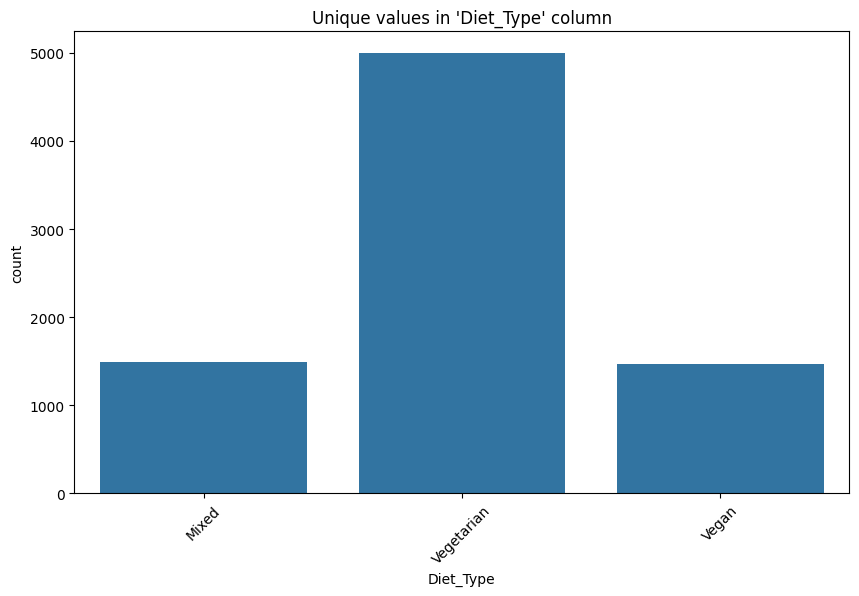

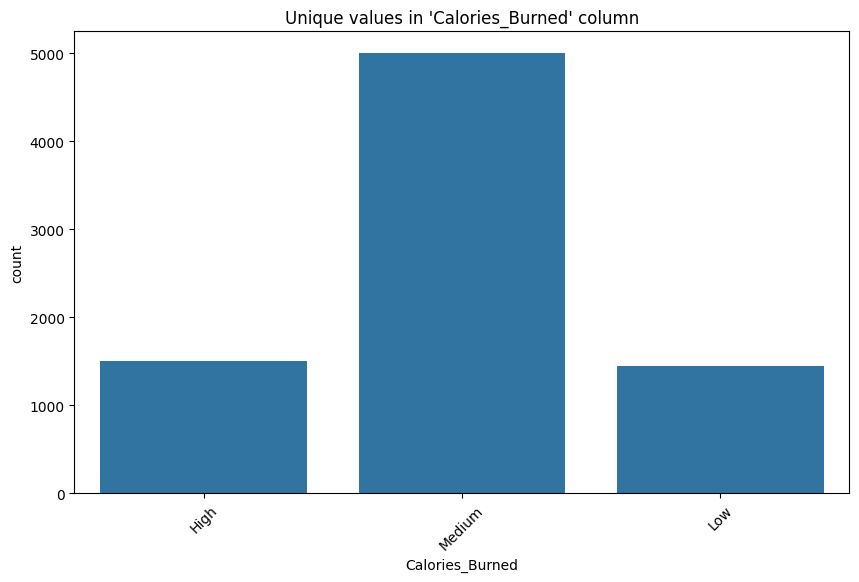

In [604]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through categorical columns and plot the unique values
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column])
    plt.title(f"Unique values in '{column}' column")
    plt.xticks(rotation=45)
    plt.show()


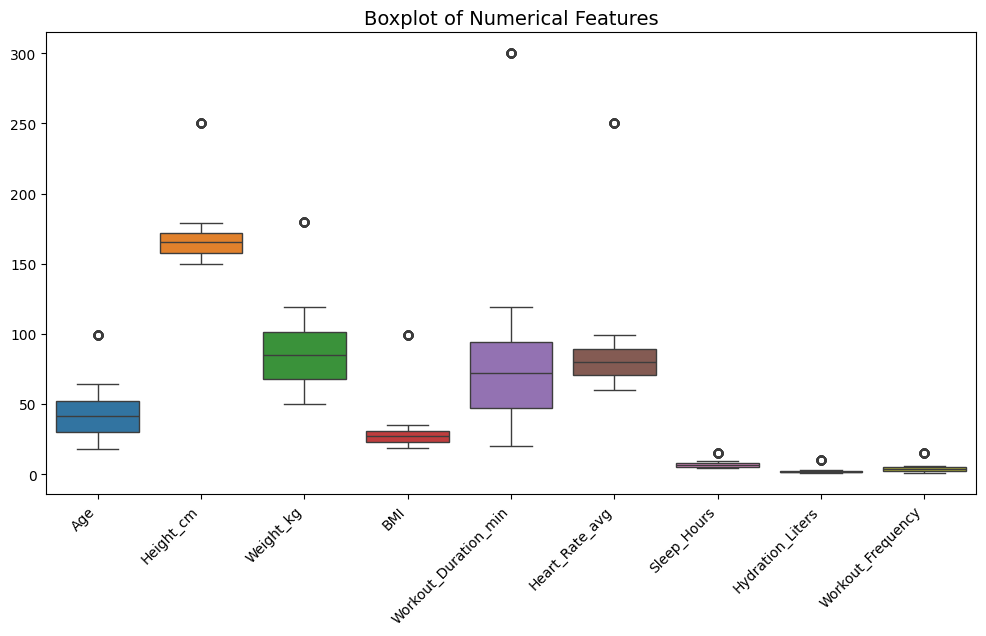

In [605]:
# prompt: boxplot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame from the previous code
# and numerical_columns is defined as before

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot of Numerical Features", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

In [606]:
#decide whether to do outliers tratment or not ,if do how?
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-(1.5*iqr)
  uw=q3+(1.5*iqr)
  return lw,uw



In [607]:
for i in numerical_columns:
  lw,uw=wisker(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])

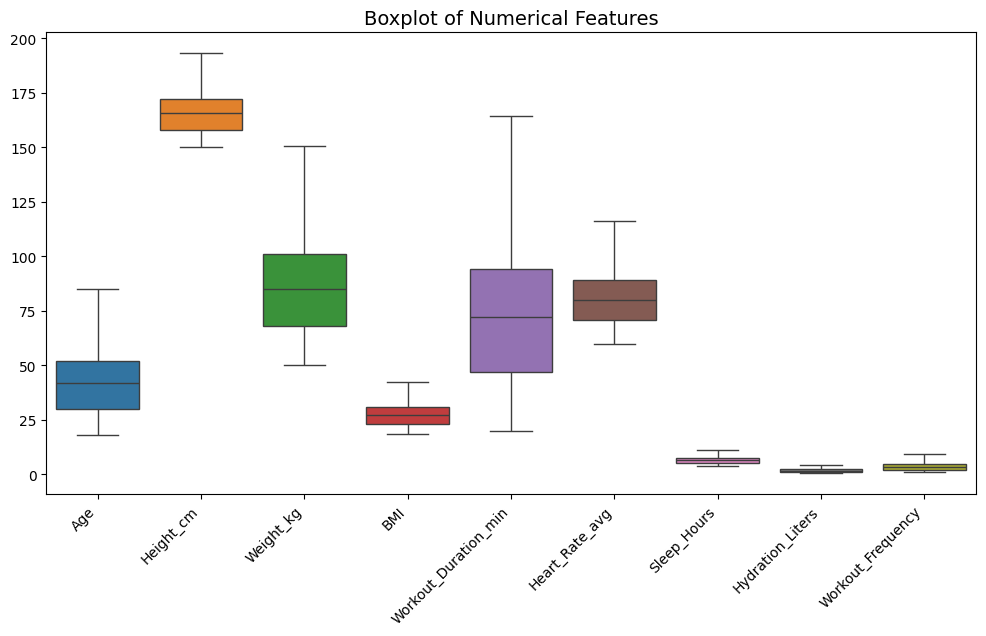

In [608]:
# prompt: boxplot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame from the previous code
# and numerical_columns is defined as before

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot of Numerical Features", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

In [610]:
# prompt: roundoff all values

# Round off numerical columns to 2 decimal places
for col in numerical_columns:
    df[col] = df[col].round(2)

In [611]:
x=df.drop(columns=['Calories_Burned'])
y=df['Calories_Burned']

In [614]:
from sklearn.preprocessing import LabelEncoder

# Define the custom mapping
custom_mapping = {'High': 0, 'Low': 1, 'Medium': 2}

# Create a LabelEncoder and apply the custom mapping
df['Calories_Burned_encoded'] = df['Calories_Burned'].map(custom_mapping)

# Print the encoded column
print(df[['Calories_Burned', 'Calories_Burned_encoded']].head())


  Calories_Burned  Calories_Burned_encoded
0            High                        0
1          Medium                        2
2             Low                        1
3            High                        0
4            High                        0


In [615]:

label_encoders = {}
for column in df.select_dtypes(include=['object', 'category']):
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
  label_encoders[column] = le  # Store the LabelEncoder object

print("Label Encoding complete.")


Label Encoding complete.


In [616]:
df.head()

,Age,Gender,Height_cm,Weight_kg,BMI,Workout_Type,Workout_Duration_min,Heart_Rate_avg,Intensity_Level,Diet_Type,Sleep_Hours,Hydration_Liters,Workout_Frequency,Calories_Burned,Calories_Burned_encoded
0,85.00,1,162.0,114.0,27.45,1,72.2,116.0,0,0,7.1,2.0,3.0,0,0
1,41.77,0,158.0,58.0,34.32,2,80.0,72.0,2,2,7.9,1.2,4.0,2,2
2,32.00,1,151.0,66.0,21.90,1,111.0,91.0,2,1,8.7,0.9,6.0,1,1
3,60.00,0,154.0,114.0,29.30,2,92.0,71.0,2,2,8.6,0.7,1.0,0,0
4,41.77,1,162.0,52.0,19.22,0,70.0,90.0,2,2,8.7,1.1,2.0,0,0


In [617]:
df.drop(columns=['Calories_Burned'],inplace=True)

In [620]:
# prompt: generate output file of df with name afterprepr

# Assuming 'df' is your DataFrame from the previous code.
df.to_csv('afterprepr.csv', index=False)

In [621]:
x=df.drop(columns=['Calories_Burned_encoded'])
y=df['Calories_Burned_encoded']

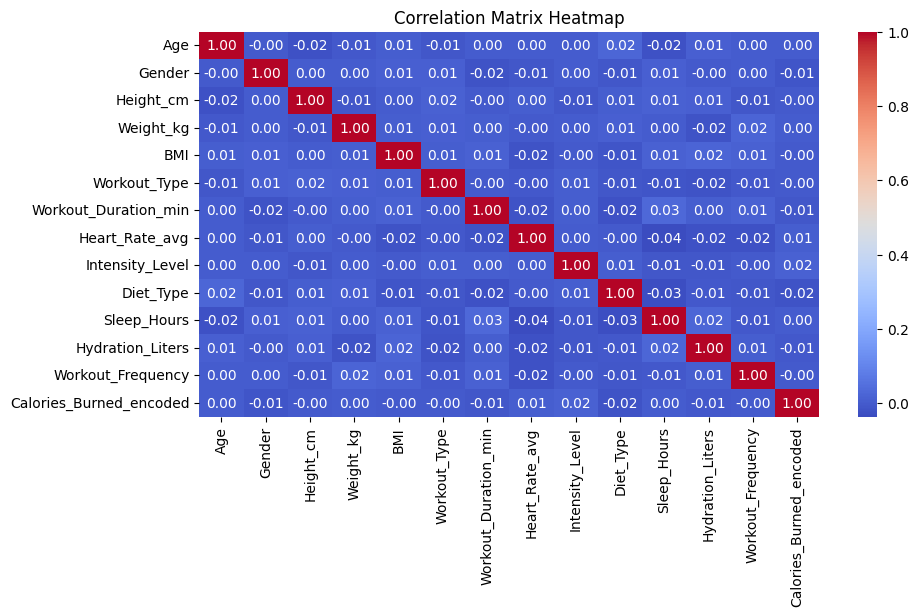

In [625]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [626]:

from sklearn.model_selection import train_test_split
import pandas as pd

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced,test_size=0.2, random_state=42)




In [627]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1014
           1       0.84      0.77      0.80       977
           2       0.69      0.77      0.73      1008

    accuracy                           0.77      2999
   macro avg       0.78      0.77      0.77      2999
weighted avg       0.78      0.77      0.77      2999



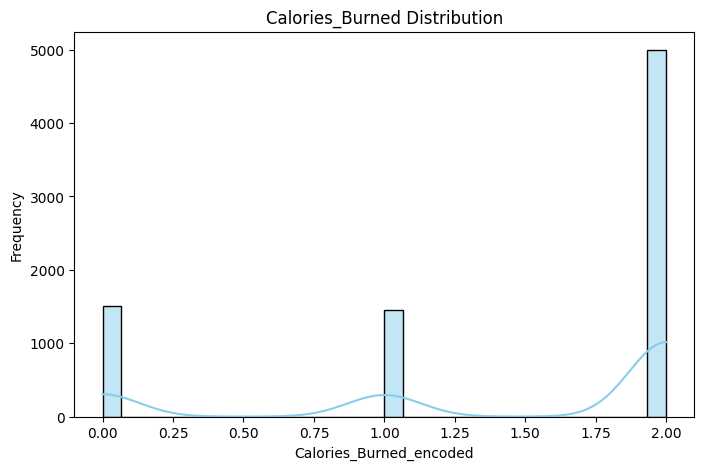

In [628]:
import matplotlib.pyplot as plt
import seaborn as sns



# Histogram for the target variable 'Price'
plt.figure(figsize=(8, 5))
sns.histplot(df['Calories_Burned_encoded'], kde=True, bins=30, color='skyblue')  # Changed to df['Calories_Burned']
plt.title('Calories_Burned Distribution')
plt.ylabel('Frequency')
plt.show()

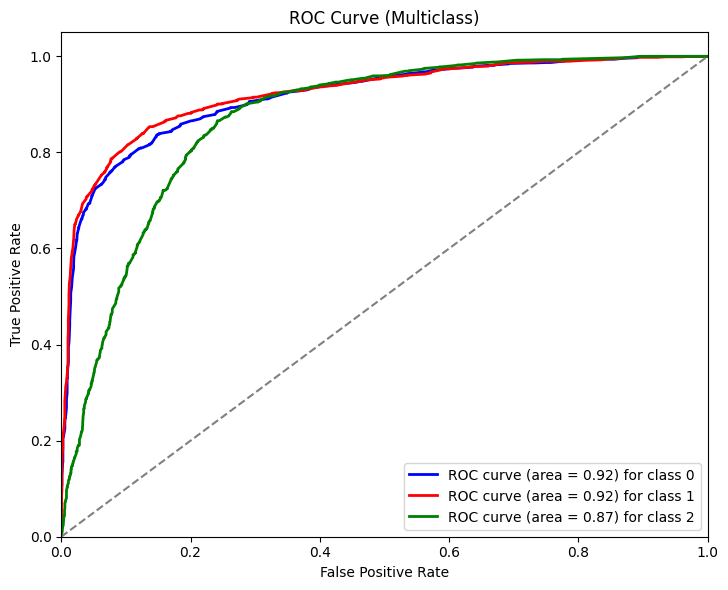

In [629]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize

# Binarize the target variable for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Predict probabilities for each class
y_prob = rf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # Subplot for ROC Curve
colors = ['blue', 'red', 'green']  # Adjust colors as needed

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')

# ... (rest of the code for Precision-Recall curve remains the same)

plt.tight_layout()
plt.show()

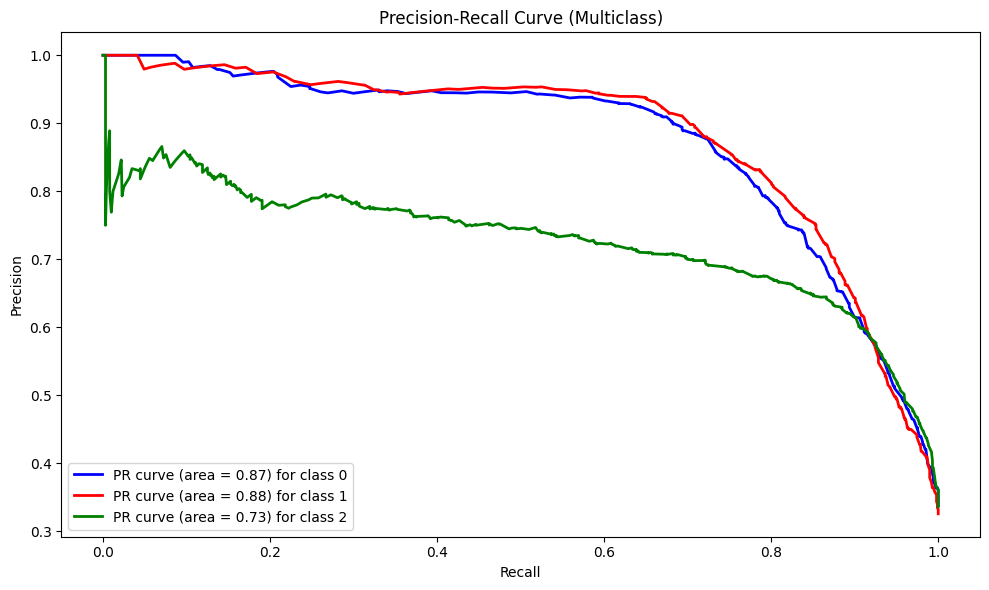

In [630]:
# Binarize the target variable for multiclass PR curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Predict probabilities for each class
y_prob = rf.predict_proba(X_test)

# Compute Precision-Recall curve for each class
precision = dict()
recall = dict()
pr_auc = dict()

for i in range(n_classes):

    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_prob[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plot Precision-Recall Curve for each class
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green']  # Adjust colors as needed

for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'PR curve (area = {pr_auc[i]:.2f}) for class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Multiclass)')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()